# Импорт данных и библиотек, первичный анализ

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

### Загружаем наш датасет

In [2]:
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Как видно из небольшого сегмента с описанием данных - наши значения уже нормализованы, кроме нескольких признаков, а именно: время и дата. Мы к ним вернемся чуть позже, когда будем преообразовывать датасет под наши задачи.
Пока нам нужно рассмотреть наш целевой признак. В нашем датасете этим признаком является столбец Class, определяющий транзакцию, как фродовую в значении 1. Давайте взглянем на распределение значений этого класса:

Распределение класса:

In [5]:
print('Чистые транзакции занимают', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% от всех данных')
print('Фрод занимает', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% от всех данных')


Чистые транзакции занимают 99.83 % от всех данных
Фрод занимает 0.17 % от всех данных


Как мы можем видеть - в датасет очень сильный перекос в сторону легальных транзакций, они занимают аж 99.83%. Анализировать данные под таким распределением не имеет смысла, а обучать алгоритмы на таких данных может привести к очень обманчивым последствиям. Тут нужно акцентировать внимание на особенности таких данных, ибо этот датасет вполне реальный и транзакционные данные в большинстве своем будут без фрода. представим себе ситуацию в которой мы, в погоне за процентами попаданий, строим два алгоритма: один из них будет всегда всегда говорить, что транзакция является легальной, а второй будет прогонять данные через обученый алгоритм машинного обучения, что произойдет? Любой алгоритм машинного обучения будет иметь ошибки, до 100% дойти невозможно, если нет прямой зависимости класса от определнных параметров, в таком случае в первом алгоритме будет точность 99.83%! Это очень высокая точность, однако фрод этот "алгоритм" не определит никогда, он просто физически этого не делает, а второй алгоритм, представляющий обучений ML алгоритм будет выдавать проценты, в большинстве случаев, ниже, ибо у нас будет два типа ошибок - алгоритм имеет ошибку не только в ложном определении транзакции, как легальную, когда она фродовая, но и наоборот! Чуть позже я продементсрирую визуально на корреляциях эту разницу.
Стоит отметить, что алгоритм, обученный на таком "непреобразованном" датасете все еще является полноценным ML-алгоритмом, однако он будет "переобучен" и не будет сильно отличаться от той гипотетической ситуации с автоматическим проставлением нулей в классе. Вопрос с переобучение я затрону подробнее чуть ниже.

Text(0.5, 1.0, 'Распределение класса')

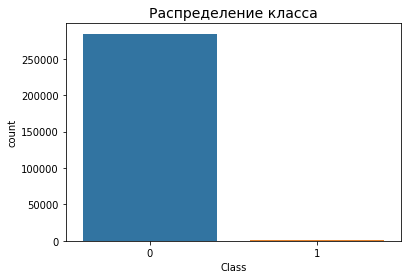

In [6]:
sns.countplot('Class', data=df)
plt.title('Распределение класса', fontsize=14)

тут мы можем визуално оценить несбалансированность целевого класса.
Давайте теперь посмотрим на 2 признака, которые у нас определены, а также которые нужно нормализовать для использования в наших алгоритмах, ибо они сильно отличаются от остальных значений по порядку. Если мы этого не сделаем, то вне рассмотрения всяческих корреляций между признаками (на это мы остановимся подробнее позже), признаки, которые имеют порядок выше будут иметь и вес выше при предсказании целевого класса, а это может быть ровным счетом наоборот.

Распределение по сумме и времени

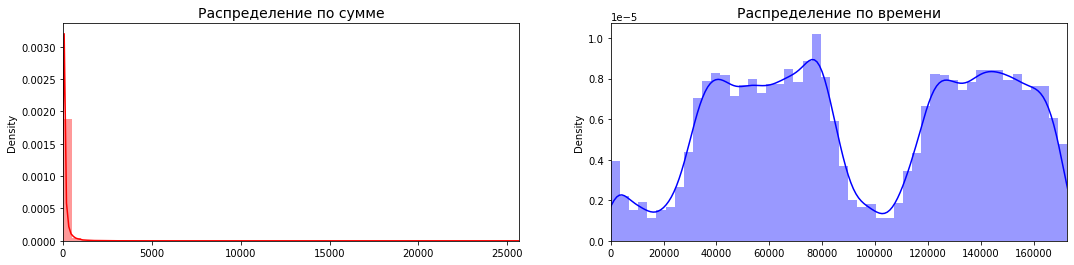

In [7]:
ig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Распределение по сумме', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Распределение по времени', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

При рассмотрении графиков этих признаков никаких аномалий не видно.
Графики вполне логичны - чаще всего проводятся транзакции с небольшими суммами, а частота транзакций падает ночью

Рескейлинг

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Сплит и объяснения андерсемплинга


Ранее я говорил о проблеме дисбаланса в классе и как она влиет на результаты, но что же нам с этой проблдемой делать? Существует несколько механик, применимых для такой ситуации. Ожной из них является андерсемплинг. По сути мы искусствено сформируем баланс в классе с помощью создания "сабсета" из наших данных. Естественно, это нужно делать аккуратно, ибо мы не хотим добавлять в субсет последовательные данные, которые нам могут попасться.

Сперва, мы должны определить, насколько наш класс несбаланситрован, а точнее посмотреть, сколько у нас фродовых транзакций, то есть количество строк, у которых целевой признак "Class" равен 1. Это можно сделать одной строкой, но в описании датасета уже приведено читсло - 492.
Затем нам нужно смешать наши транзакции так, чтобы получился датасет, где распределение классов было бы 50/50. Естественно мы возьмем все фродовые транзакции и надо прибавить к ним столько же нефродовых. Однако, мы не можем себе позволить это сделать напрямую. Мы не знаем, как эти данные расположены внутри, может у них уже есть внутри выстроенные корреляци. Для того, чтобы нивелировать факт этих случайных петтернов, перед тем, как добавить нефродровые транзакции мы их перемешаем.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


X = df.drop('Class', axis=1)
y = df['Class']

#Фолдом разбиваем на тренировочную и тестовую выборки
skfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skfold.split(X, y):

    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [11]:
#Рецепт простого андерсемплинга:

#1 Перемешать
df = df.sample(frac=1)

#2 Приготовить ингредиенты (492 фродовых строк, равное колическо нефродовых добавляен в датасет)
fraud = df.loc[df['Class'] == 1]
no_fraud = df.loc[df['Class'] == 0][:492]

#3 Замешать
concat_df = pd.concat([fraud, no_fraud])

#4 Снова перемешать
new_df = concat_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
196692,0.391253,0.551616,-0.764756,0.520918,0.031596,-0.739209,1.194967,-0.619741,1.226372,-0.139733,...,-0.162045,0.406538,1.139965,-0.480781,0.812108,0.605929,-0.010824,-0.063741,0.149366,0
221018,4.164186,0.677898,-3.367770,0.099249,-6.148487,3.401955,0.458307,-1.571630,-1.358708,0.672409,...,0.264699,0.861308,1.249301,1.850627,-0.117471,1.219815,0.000251,1.036011,0.004367,1
133364,2.815343,-0.050964,-7.410554,-2.878063,-0.802336,2.593668,-0.317436,0.564312,-0.639989,0.711142,...,-2.406969,-0.382964,-0.167470,-3.721850,-0.587038,-0.145097,-0.135871,-1.135821,-1.191362,0
157868,-0.296793,0.303751,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,...,0.520840,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,1
105178,-0.293440,-0.179725,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,...,-0.099712,-0.367136,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1


Можем вглянуть на распределение в нашем новом сабсете визуально и сравнить с тем, что было раньше.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


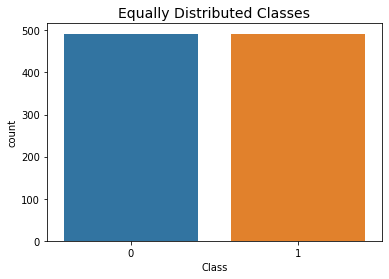

In [12]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Ранее я говорил, что влияние дисбаланса целевого класса можно увидеть визуально через корреляции. Теперь, когда нам доступен сбалансированный субсет, мы можем сравнить матрицы корреляций этих двух выборок.

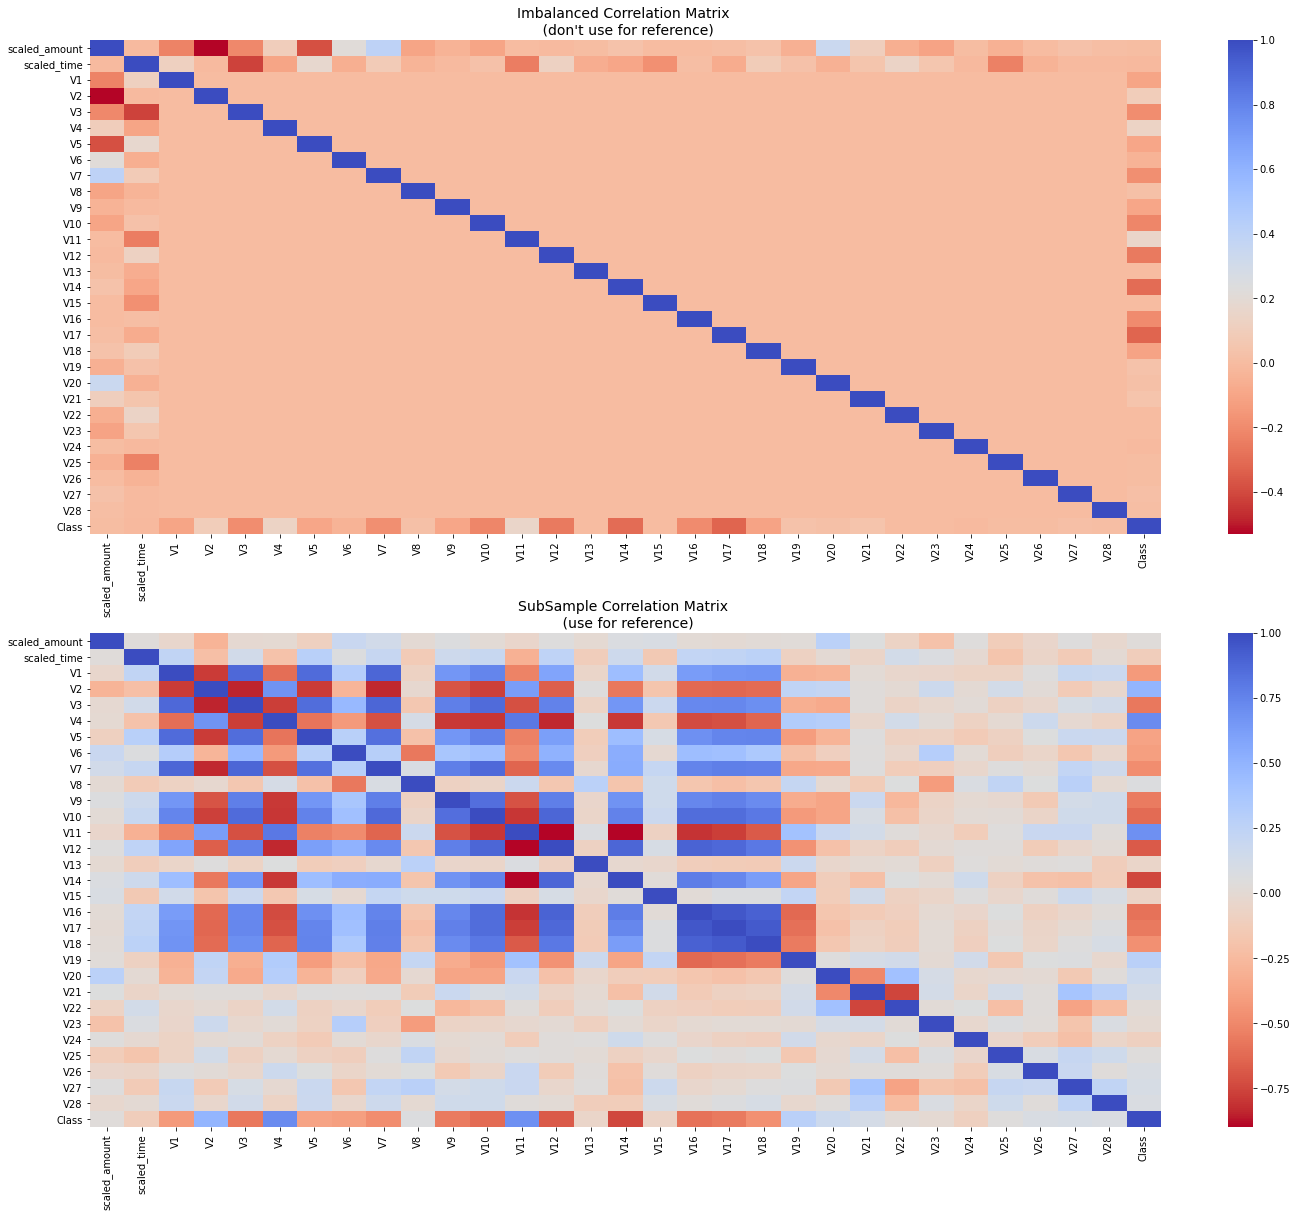

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

На матрицах хорошо видно разницу. При несбалансированном классе корреляций почти не видно, ибо целевое значение (имеется в виду единица в нашем классе) представлена всего лишь 0,17%, однако при построении корреляций для сбалансированного субсета зависимости проявляются.

# Классификация


В данном сегменте мы рассмотрим 4 разных алгоритма машинного обучения на практик: обучим, настроим, а также оценим их работу.

In [14]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

Тут мы даем первые предсказания на тренировочных выборках. Как можем заметить, логистическая регрессия работает лучше, однако рано делать какие-то выводы. Для того, чтобы улучшить качество наших алгоритмов их нужно "настроить", а точнее подобрать наилучшие параметры.

In [15]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


Здесь мы подбираем наилучшие параметры стандартным методом GridSearch и вставляем в наши классификаторы.

In [16]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

Одной из важных тонкостей работы с предсказательными моделями, да и в принципе со всеми алгоритмами машинного обучения является переобучени и недоуобучение. При условии, что мы переобучили модель, наш алгоритм будет выдавать весьма высокие результаты на обучающей выборке, однако на реальных данных модель будет выдавать низкий результат. В ситауции, при которой модель недообучена, результаты будут низкими и там и там. 
Мы можем это проверить через разницу в результате между нашими обученными алгоритмами и кросс-валидацией.
В базовом подходе, называемом k- кратным CV, обучающая выборка разбивается на "фолды", и для кажого такого осуществля Для каждой из k «фолдов» выполняется следующая процедура :

Модель обучается с использованием k-1 складок в качестве обучающих данных;
Результирующая модель проверяется на оставшейся части данных (т. е. она используется в качестве тестового набора для вычисления показателя производительности, такого как точность).

Здесь мы могли бы подобрать лучшие параметры, но мы это сделали на предыдщуем шаге.

In [17]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.78%
Knears Neighbors Cross Validation Score 92.51%
Support Vector Classifier Cross Validation Score 93.78%
DecisionTree Classifier Cross Validation Score 92.12%


Как можем заметить, сильной разницы между результатами нет, поэтому с проблемой переобучения и недообучения работать не требуется. Однако оценка еще не завершена. Использровать accuracy, то есть "фактические попадания" некорректно в данной модели. Мы будет использовать метрику ROC. Чем выше метрика, тем лучше алгоритм справляется с разделением класса, то есть лучше определяет, что фрод, а что нет.

In [18]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [19]:
from sklearn.metrics import roc_auc_score

print('roc-auc Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('roc-auc KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('roc-auc Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('roc-auc Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

roc-auc Logistic Regression:  0.9770473789670999
roc-auc KNears Neighbors:  0.9233695300885528
roc-auc Support Vector Classifier:  0.973757352465904
roc-auc Decision Tree Classifier:  0.9180143494279621


Как можем заметить лучше всех справились Логистическая регрессия и опорные векторы, но мы помним, что это еще не тестовая выборка. Наши алгоритмы нужно проверить в последний раз на данных, которые они еще не видели.

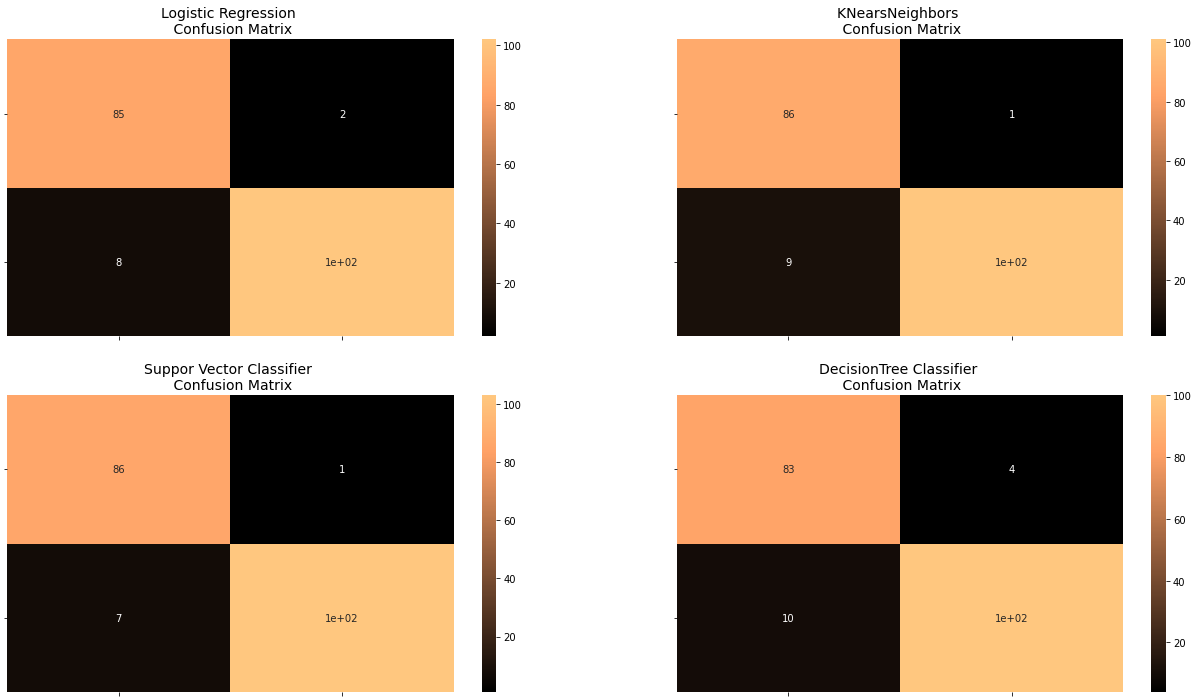

In [20]:
from sklearn.metrics import confusion_matrix


y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [21]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        87
           1       0.98      0.93      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.92      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.99      0.94      0.96       110

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted

In [22]:


log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_test, y_test, cv=5)

svc_pred = cross_val_predict(svc, X_test, y_test, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_test, y_test, cv=5)

print('roc-auc Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('roc-auc KNearest Neighbors: ', roc_auc_score(y_test, knears_pred))
print('roc-auc Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('roc-auc Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred))

roc-auc Logistic Regression:  0.9856844305120167
roc-auc KNearest Neighbors:  0.9487983281086729
roc-auc Support Vector Classifier:  0.9696969696969697
roc-auc Decision Tree Classifier:  0.8946708463949842


Тут ситуация у наших победителей уже ухудшилась и сравнялась с остальными. Скорее всего какой-то шанс переобучения просочился, но он не настолько существенен. Я думаю, что дело скорее не в переобучении, а в выборосах в данных, но убирать я их не стал осознано. Когда мы рабтает с фродом - выборосы не являются "выбросами". Если мы будем убирать строки, которые выделяются, то сильно рискуем потерей информации, а это, хоть и в процентном выражении будет лучше (как мы уже обсуждали с метрикой accuracy), то само определения класса фрода будет хуже.

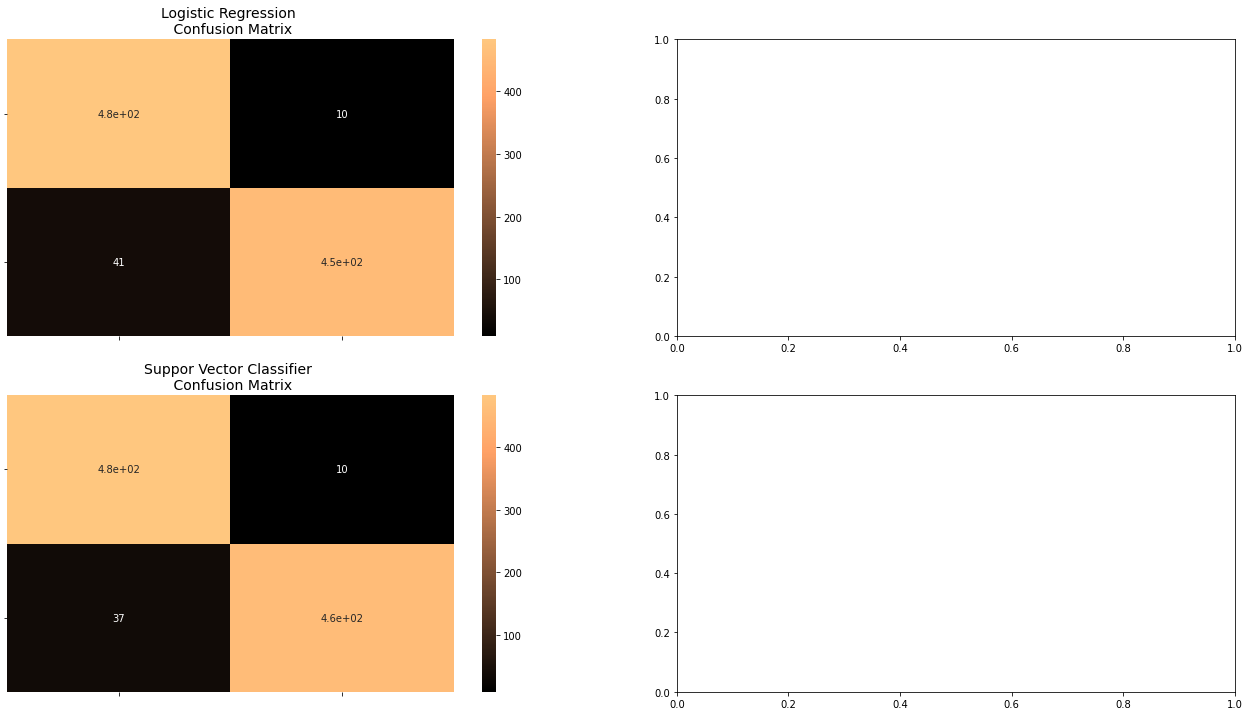

In [23]:
from sklearn.metrics import confusion_matrix


y_pred_log_reg = log_reg.predict(X)

# Other models fitted with UnderSampling
y_pred_svc = svc.predict(X)

log_reg_cf = confusion_matrix(y, y_pred_log_reg)

svc_cf = confusion_matrix(y, y_pred_svc)


fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

То есть точность SVM по определению фрода (то есть TN + FN, нам нужно конкретно число фрода, которая модель смогла распознать) 92,5% а LogReg 91,7% среднее 92,1